In [1]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Data Retrieval
ramen_df = pd.read_csv("./ramen-ratings.csv")
ramen_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2580 entries, 0 to 2579
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Review #  2580 non-null   int64 
 1   Brand     2580 non-null   object
 2   Variety   2580 non-null   object
 3   Style     2578 non-null   object
 4   Country   2580 non-null   object
 5   Stars     2580 non-null   object
 6   Top Ten   41 non-null     object
dtypes: int64(1), object(6)
memory usage: 141.2+ KB


In [3]:
# Data Cleaning
ramen_df.drop(ramen_df[ramen_df["Stars"] == "Unrated"].index, inplace=True)
ramen_df.reset_index(inplace=True)
ramen_df["Stars"] = pd.to_numeric(ramen_df["Stars"], errors='coerce')
ramen_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2577 entries, 0 to 2576
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   index     2577 non-null   int64  
 1   Review #  2577 non-null   int64  
 2   Brand     2577 non-null   object 
 3   Variety   2577 non-null   object 
 4   Style     2575 non-null   object 
 5   Country   2577 non-null   object 
 6   Stars     2577 non-null   float64
 7   Top Ten   41 non-null     object 
dtypes: float64(1), int64(2), object(5)
memory usage: 161.2+ KB


### 1. Which continents makes the best ramen?
To be able to answer this question, the countries of each ramen entry in the dataset need to be grouped in their continents. From their accumulated average rating, we can determine which continents are on top of their ramen game.

First, we must determine the continents in which these countries belong. Let us determine the unique countries.

In [4]:
ramen_df["Country"].unique()

array(['Japan', 'Taiwan', 'USA', 'India', 'South Korea', 'Singapore',
       'Thailand', 'Hong Kong', 'Vietnam', 'Ghana', 'Malaysia',
       'Indonesia', 'China', 'Nigeria', 'Germany', 'Hungary', 'Mexico',
       'Fiji', 'Australia', 'Pakistan', 'Bangladesh', 'Canada', 'Nepal',
       'Brazil', 'UK', 'Myanmar', 'Netherlands', 'United States',
       'Cambodia', 'Finland', 'Sarawak', 'Philippines', 'Sweden',
       'Colombia', 'Estonia', 'Holland', 'Poland', 'Dubai'], dtype=object)

We're seeing some duplicate countries, as well as some special administrative regions under other countries, so let us perform some mapping for the `Country` column.

In [5]:
countries_dict = {
    "United States": "USA", "Hong Kong": "China/Hong Kong", "China": "China/Hong Kong", "Dubai": "UAE", "Sarawak": "Malaysia",
    "Japan": "Japan", "Taiwan": "Taiwan", "India": "India", "South Korea": "South Korea", "Singapore": "Singapore", "Thailand": "Thailand", "Vietnam": "Vietnam", "Malaysia": "Malaysia", "Indonesia": "Indonesia", "Pakistan": "Pakistan", "Bangladesh": "Bangladesh", "Nepal": "Nepal", "Myanmar": "Myanmar", "Cambodia": "Cambodia", "Philippines": "Philippines",
    "Mexico": "Mexico", "Canada": "Canada", "USA": "USA",
    "Ghana": "Ghana", "Nigeria": "Nigeria",
    "Germany": "Germany", "Hungary": "Hungary", "UK": "UK", "Netherlands": "Netherlands", "Finland": "Finland", "Sweden": "Sweden", "Estonia": "Estonia", "Holland": "Holland", "Poland": "Poland",
    "Fiji": "Fiji", "Australia": "Australia",
    "Brazil": "Brazil", "Colombia": "Colombia"
}

ramen_df["Country"] = ramen_df["Country"].map(countries_dict)
ramen_df["Country"].unique()

array(['Japan', 'Taiwan', 'USA', 'India', 'South Korea', 'Singapore',
       'Thailand', 'China/Hong Kong', 'Vietnam', 'Ghana', 'Malaysia',
       'Indonesia', 'Nigeria', 'Germany', 'Hungary', 'Mexico', 'Fiji',
       'Australia', 'Pakistan', 'Bangladesh', 'Canada', 'Nepal', 'Brazil',
       'UK', 'Myanmar', 'Netherlands', 'Cambodia', 'Finland',
       'Philippines', 'Sweden', 'Colombia', 'Estonia', 'Holland',
       'Poland', 'UAE'], dtype=object)

Since there are only 35 countries, it is manageable to assign continents to the country of each entry.

In [6]:
asia = ["Japan", "Taiwan", "India", "South Korea", "Singapore", "Thailand", "Hong Kong", "Vietnam", "Malaysia", "Indonesia", "China/Hong Kong", "Pakistan", "Bangladesh", "Nepal", "Myanmar", "Cambodia", "Philippines", "UAE"]
northam = ["USA", "Mexico", "Canada"]
africa = ["Ghana", "Nigeria"]
europe = ["Germany", "Hungary", "UK", "Netherlands", "Finland", "Sweden", "Estonia", "Holland", "Poland"]
australia = ["Fiji", "Australia"]
southam = ["Brazil", "Colombia"]

continents = []

for i in range(len(ramen_df)):
    if ramen_df["Country"][i] in asia:
        continents.append("Asia")
    elif ramen_df["Country"][i] in northam:
        continents.append("North America")
    elif ramen_df["Country"][i] in africa:
        continents.append("Africa")
    elif ramen_df["Country"][i] in europe:
        continents.append("Europe")
    elif ramen_df["Country"][i] in australia:
        continents.append("Australia and Oceania")
    elif ramen_df["Country"][i] in southam:
        continents.append("South America")
        
ramen_df["Continent"] = continents
ramen_df.head()

,index,Review #,Brand,Variety,Style,Country,Stars,Top Ten,Continent
0,0,2580,New Touch,T's Restaurant Tantanmen,Cup,Japan,3.75,NaN,Asia
1,1,2579,Just Way,Noodles Spicy Hot Sesame Spicy Hot Sesame Guan...,Pack,Taiwan,1.00,NaN,Asia
2,2,2578,Nissin,Cup Noodles Chicken Vegetable,Cup,USA,2.25,NaN,North America
3,3,2577,Wei Lih,GGE Ramen Snack Tomato Flavor,Pack,Taiwan,2.75,NaN,Asia
4,4,2576,Ching's Secret,Singapore Curry,Pack,India,3.75,NaN,Asia


Now that we have determined the continent for the country of each ramen entry, let us look at the numbers for each continent to see which ones are worth analyzing.

In [7]:
ramen_df.groupby("Continent").agg({"Continent": ["count"]})

,Continent
,count
Continent,
Africa,3
Asia,2011
Australia and Oceania,26
Europe,136
North America,390
South America,11


Based from the ramen entry count for each continent, we can see that only Asia, Europe, and North America have more than 30 observations, which is the general rule of thumb for the population size of data analysis. For the remainder of this question, let us focus on these three continents.

In [8]:
# Additional Cleaning
ramen_df.drop(ramen_df[(ramen_df["Continent"] == "Africa") | (ramen_df["Continent"] == "Australia and Oceania") | (ramen_df["Continent"] == "South America")].index, inplace=True)
ramen_df.reset_index(inplace=True)
ramen_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2537 entries, 0 to 2536
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   level_0    2537 non-null   int64  
 1   index      2537 non-null   int64  
 2   Review #   2537 non-null   int64  
 3   Brand      2537 non-null   object 
 4   Variety    2537 non-null   object 
 5   Style      2535 non-null   object 
 6   Country    2537 non-null   object 
 7   Stars      2537 non-null   float64
 8   Top Ten    41 non-null     object 
 9   Continent  2537 non-null   object 
dtypes: float64(1), int64(3), object(6)
memory usage: 198.3+ KB


Text(0.5, 1.0, 'Top 3 Ramen Continents')

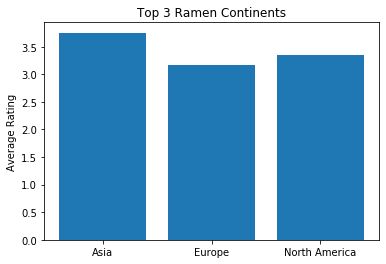

In [9]:
ramen_continents_df = ramen_df.groupby("Continent").mean().reset_index()

plt.bar(range(len(ramen_continents_df)), ramen_continents_df["Stars"])
plt.xticks(range(len(ramen_continents_df)), ramen_continents_df["Continent"])
plt.ylabel("Average Rating")
plt.title("Top 3 Ramen Continents")